In [1]:
from matplotlib import pyplot as pl
import numpy as np
#%matplotlib inline


In [2]:
import os
project_dir = os.path.dirname(os.path.dirname(os.getcwd()))
import pandas as pd


In [3]:
data_dir = project_dir+"/results_BW"

In [9]:
data_ids = [i for i in range(1,4,1)]
noise_levels = [i for i in range(0,12,2)]
seeds = [i for i in range(1,4,1)]


approaches = ['Random',"EN","MI"]
adds = [1,2,3]
iterations = [180,90,60]

linecolors = ['#CC4F1B','#1B2ACC','#3F7F4C']
facecolors=['#FF9848','#089FFF','#7EFF99']


In [5]:
data_id = data_ids[0]
noise_level = noise_levels[0]
add = adds[2]
iteration = iterations[2]
approach = approaches[2]

In [6]:
"data_"+str(data_id)+"_every_"+str(add)+"_noise_"+str(noise_level)

'data_1_every_3_noise_0'

In [69]:
data_id = 2
add = 1
iteration = 180
noise_level = 0
seed = 1

In [70]:

folder = 'data_'+str(data_id)+"_noise_"+str(noise_level) + "_seed_" +str(seed)
file_pathes = [data_dir + "/" +folder +'/' + approach +'/every_'+str(add)+"_iter_"+str(iteration)
               +".csv" for approach in approaches]
dfs = [pd.read_csv(file_path) for file_path in file_pathes]
df = pd.concat(dfs, axis = 1)
df["EN"] = (df.iloc[:,1]-df.iloc[:,3])/df.iloc[:,1] *100
df["MI"] = (df.iloc[:,1]-df.iloc[:,5])/df.iloc[:,1] *100

In [75]:
df.head()

,nums,errors,nums,errors,nums,errors,EN,MI
0,50,0.015052,50,0.015052,50,0.015052,0.000000,0.000000
1,51,0.009030,51,0.010140,51,0.010140,-12.290601,-12.290601
2,52,0.007802,52,0.006409,52,0.006409,17.859388,17.859388
3,53,0.008009,53,0.005638,53,0.005638,29.609531,29.609531
4,54,0.007853,54,0.005473,54,0.005482,30.309951,30.196170


In [ ]:
%matplotlib inline
pl.plot(df.iloc[:138,0], df.iloc[:138,6], 'k', color=linecolors[k])
            

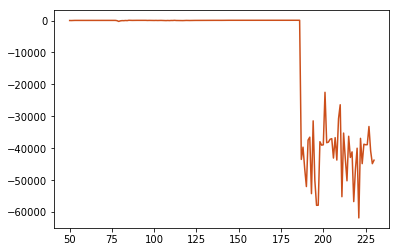

In [77]:
%matplotlib inline
pl.plot(df.iloc[:,0], df['EN'], 'k', color=linecolors[k])
            

In [49]:
df.head()

,nums,errors,nums,errors,nums,errors,EN
0,50,0.247949,50,0.247949,50,0.247949,0.000000
1,51,0.245971,51,0.239069,51,0.242308,0.013533
2,52,0.246269,52,0.238805,52,0.241578,0.014354
3,53,0.245286,53,0.241307,53,0.236196,0.007507
4,54,0.200138,54,0.233780,54,0.235733,-0.062299


In [7]:
data_id = 1
for add,iteration in zip(adds,iterations):
    for noise_level in noise_levels:
        title = "data_"+str(data_id)+"_every_"+str(add)+"_noise_"+str(noise_level)
        f = pl.figure()
        pl.hold(1)
        
        for k, approach in enumerate(approaches):
            folders = ['data_'+str(data_id)+"_noise_"+str(noise_level) + "_seed_" +str(seed) for seed in seeds]
            file_pathes = [data_dir + "/" +folder +'/' + approach +'/every_'+str(add)+"_iter_"+str(iteration)
                           +".csv" for folder in folders]
            dfs = [pd.read_csv(file_path) for file_path in file_pathes]
  
            df = pd.concat(dfs, axis = 1)
            df[approach] = df.apply(lambda x: np.mean(x[1::2]), axis=1)
            df['std'] = df.apply(lambda x: np.std(x[1::2]), axis=1)
            x = df.ix[:,0]
            y = df[approach]
            error = df['std']
            pl.plot(x, y, 'k', color=linecolors[k])
            pl.fill_between(x, y-error, y+error,alpha=0.2, edgecolor=facecolors[k], facecolor=facecolors[k])
        pl.legend(loc=(0.7,0.7))
        pl.title(title) 
        pl.xlabel("# of samples")
        pl.ylabel("Normalized MAE")

        axes = pl.gca()
        axes.set_ylim([min(y)/2,y[0]])
        f.savefig(os.path.join(project_dir,"out_fig/Method",title+".jpg"))

/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/ind

In [10]:
for data_id in data_ids:
    for add,iteration in zip(adds,iterations):
        for noise_level in noise_levels:
            title = "data_"+str(data_id)+"_every_"+str(add)+"_noise_"+str(noise_level)
            f = pl.figure()
            pl.hold(1)
            for k, approach in enumerate(approaches):
                folders = ['data_'+str(data_id)+"_noise_"+str(noise_level) + "_seed_" +str(seed) for seed in seeds]
                file_pathes = [data_dir + "/" +folder +'/' + approach +'/every_'+str(add)+"_iter_"+str(iteration)
                               +".csv" for folder in folders]
                dfs = []
                for file_path in file_pathes:
                    try:
                        dfs.append(pd.read_csv(file_path))
                    except:
                        print("missing:",file_path)

                df = pd.concat(dfs, axis = 1)
                df[approach] = df.apply(lambda x: np.mean(x[1::2]), axis=1)
                df['std'] = df.apply(lambda x: np.std(x[1::2]), axis=1)
                x = df.ix[:,0]
                y = df[approach]
                error = df['std']
                pl.plot(x, y, 'k', color=linecolors[k])
                pl.fill_between(x, y-error, y+error,alpha=0.2, edgecolor=facecolors[k], facecolor=facecolors[k])
            pl.legend(loc=(0.7,0.7))
            pl.title(title) 
            pl.xlabel("# of samples")
            pl.ylabel("Normalized MAE")
            
            axes = pl.gca()
            axes.set_ylim([min(y)/2,y[0]])
            f.savefig(os.path.join(project_dir,"out_fig/Method",title+".jpg"))

/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: 

missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_2_noise_0_seed_3/EN/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_2_noise_2_seed_3/MI/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_2_noise_6_seed_2/MI/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_2_noise_10_seed_2/Random/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_2_noise_10_seed_2/MI/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_3_noise_2_seed_3/Random/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_3_noise_2_seed_1/EN/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_3_noise_2_seed_3/MI/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_surface/results_BW/data_3_noise_4_seed_3/Random/every_1_iter_180.csv
missing: /home/wxk/Git/OED/OED_multiple_s

In [ ]:
df['test'] = df.apply(lambda x: np.mean(x[1::2]), axis=1)

In [55]:
df.head()

,nums,errors,nums,errors,nums,errors,Random,std
0,50,0.247949,50,0.236236,50,0.186749,0.223644,0.026524
1,51,0.245971,51,0.240573,51,0.188023,0.224855,0.026138
2,52,0.246269,52,0.236616,52,0.187020,0.223302,0.025956
3,53,0.245286,53,0.237261,53,0.181737,0.221428,0.028256
4,54,0.200138,54,0.236822,54,0.181274,0.206078,0.023063


/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/ind

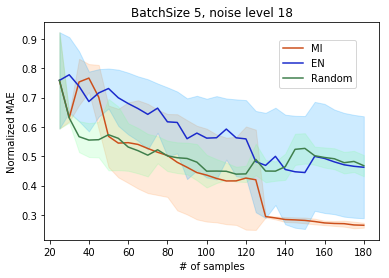

In [6]:
for j in range(6):
    for p in range(3):
        title = "BatchSize "+str(adds[p])+", noise level "+str(noise_levels[j])
        pl.clf()
        f = pl.figure()
        pl.hold(1)
        for k in range(3):

            file_pathes = [os.path.join(project_dir,"out_data/previous",
                     "errors"+str(i)+"real"+"noise"+str(noise_levels[j]),
                     approaches[k],
                     "every_"+str(adds[p])+"_"+str(iterations[p])+"_iter.csv") for i in range(1,4)]

            dfs = [pd.read_csv(file_path) for file_path in file_pathes]
            df = pd.concat(dfs, axis = 1)
            df[approaches[k]] = df.apply(lambda x: np.mean(x[1::2]), axis=1)
            df['std'] = df.apply(lambda x: np.std(x[1::2]), axis=1)

            x = df.ix[:,0]
            if len(x)==80:
                x = x*2
            if len(x) == 32:
                x = x*5
            x +=20
            y = df[approaches[k]]
            error = df['std']


            pl.plot(x, y, 'k', color=linecolors[k])
            pl.fill_between(x, y-error, y+error,
                alpha=0.2, edgecolor=facecolors[k], facecolor=facecolors[k])
        pl.legend(loc=(0.7,0.7))
        pl.xlabel("# of samples")
        pl.ylabel("Normalized MAE")
        pl.title(title)
        f.savefig(os.path.join(project_dir,"out_fig",title+".pdf"))

In [127]:


os.path.join(project_dir,"out_fig","BatchSize_"+str(adds[p])+"noise_level"+str(noise_levels[j]))



'/home/wxk/OED_linux/out_fig/BatchSize_1noise_level18'